# FOURIER TRANSFORM OF OSCILLATOR RESPONSE

## Brewster FFT

## Alastair McLean

In the following cell we load all the Python code we need. You can see we will use numpy, matplotlib and scipy.optimize. The latter contains the code that will be used to perform the non-linear least squares lineshape fits. We also include some Python code I wrote for performing the fast Fourier transform called Brewster_fft. The other lines just specify which lineshapes we want to use from the fitting package (lmfit). You can read the [manual](https://lmfit.github.io/lmfit-py/intro.html) if you want more information. 

In [ ]:
import numpy as np
import scipy.optimize
import brewster_fft as br
import matplotlib.pyplot as plt
from lmfit.models import GaussianModel
from lmfit.models import LorentzianModel
from lmfit.models import VoigtModel
from lmfit.models import LinearModel
from lmfit.models import QuadraticModel
%matplotlib inline

# Experiment notes
##### all rates - 100

DAta 1
- Coupling - 0
- rate - 100
- fft peak - 3.7

Data 2 - try redoing, no two modes :(
- Coupling - 100max
- rate - 100
- fft peak - 3.7, small one at 3?

Data 3
- Coupling - (-100)
- fft peaks - 3.7 and 4.0
    - on the y axis - 323.077 for 3.7 and 564.5 for 4.0 (y axis are approximate values, to the nearest whole number)

Data 4 (Data 2 redone)
- Coupling - 100
- fft peaks - 3.7, around 130 on the y axis

Data 5 (Data 2 again)
- Coupling - 100
- fft peaks - 3.7 - about 115 for y

Data 6 (2 aGain)
- Coupling - 100
- fft peaks - 3.7, smol around 5.9, y around 325

Data 7
- Coupling @74
- fft peaks - 3.7, another smol around 5.9, y around 350(slightly less than)

Data 8
- Coupling - 0
- fft peaks - 3.7

Data 9
- Coupling - (-100) again
- peaks - 3.7, bigger at 4.0, ~120 and 180 respectively on the y axis

### Load the data file using numpy loadtxt

Use this code to load data from the Virtual Instrument CSV file. Either specify the exact location of the file or just place the file in the same folder as your Jupyter Notebook. In the following example, I have my data in a folder called 'data' in the folder where this notebook is located.

In [2]:
# sampling rate 100 Hz
r  = np.loadtxt("/Users/alisonandrade/zphys250/Tutorials/Week_8/2020-12-19-200s-90-positive.csv")

### The time interval between data points
The Fourier transform needs to know what the time interval between points is. This is a parameter that you set in the VI when you do the experiment. You should record the value of the sampling rate.  I recommend 100Hz because then if you want to measure for 200s you simple take 20,000 points. 

In [3]:
# Enter your sample rate here.
# The code calculates the time interval between samples from the sample rate. 
samplerate = 100.0
dt = 1/samplerate
print("The sampling rate =%10.3e"% samplerate)
print("The time interval =%10.3e"% dt)
# I define the time array. 
t = np.arange(start = 0.0, stop = np.size(r)*dt, step = dt)

The sampling rate = 1.000e+02
The time interval = 1.000e-02


### Plot the data

This function allows you to plot the measured response of the oscillator. It also adds two red points to the graph with indices 'start' and 'stop'. Select appropriate values of start and stop to remove any transients either from the start or the end of the measured response. 

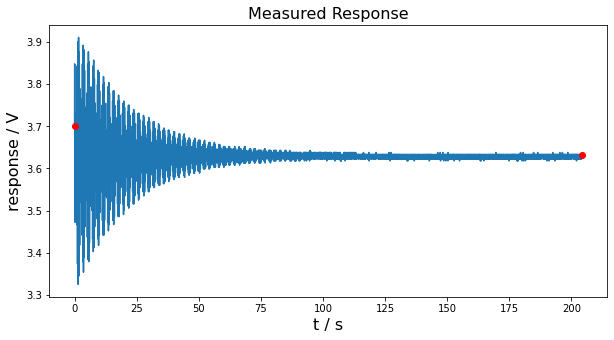

In [4]:
# defaults sizes for the plots
width = 10
height = 5
# default value for start is 0. 
start = 0
# default value for stop is the last index of the array.
stop = np.size(r)-1
br.plotwaveandtwopoints(width, height, t, r,\
                     "t / s", "response / V", "Measured Response", False, start, stop)

In [5]:
# Now that start and stop have been selected, we truncate the two arrays appropriately.
tt=t[start:stop]
rr=r[start:stop]

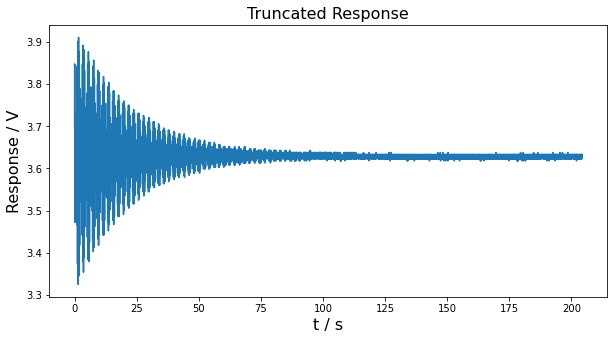

In [6]:
# Let us plot the reponse to make sure the array has been truncated the way we wanted it to be.
br.plotwave(width, height, tt, rr, "t / s", "Response / V", "Truncated Response", False)

### The power spectrum

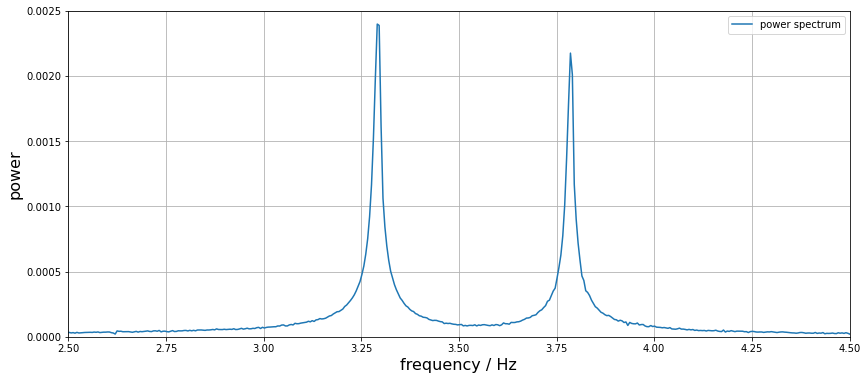

In [7]:
# We now calculate the power spectrum of the response examining 
# only the range between startfrequency and stopfrequency.
power_data, f = br.calculatepowerspectrum(rr, dt)
br.plotpowerspectrum(f, power_data, startfrequency = 2.5, stopfrequency = 4.50, 
                  save = False, name ="name.pdf", ymax = 0.0025)

### Finding the positions of the peaks using least-squares fitting

In [8]:
# We have to truncate the power spectrum so that we have only the frequencies around the eigenfrequencies.
# This function finds the indexes that correspond to lower and upper frequency bounds that we select.
# The natural frequency of the oscillator is close to 3.8 Hz, so we normally choose a narrow range around this value. 
def find_lower_upper_indices(lower,upper,x):
    t_lower=0
    t_upper=0
    for i in range(len(x)):
        if x[i] < lower:
            t_lower=i
        if x[i] < upper:
            t_upper = i
    return t_lower, t_upper

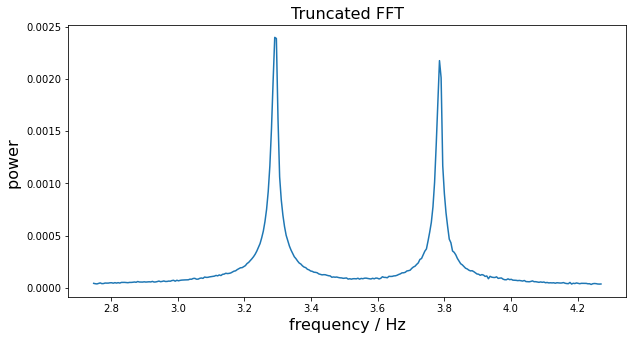

In [9]:
# We now truncate the power spectrum to contain only frequencies in a narrow range 
# centered on the natural frequency of the oscillator. 
#start, stop = find_lower_upper_indices(2.50,4.53,f)
start, stop = find_lower_upper_indices(2.75,4.28,f)
#print(start,stop)
ff=f[start:stop]
pp=power_data[start:stop]
br.plotwave(width, height, ff, pp, "frequency / Hz", "power ", "Truncated FFT", False)

## LMFit Solution

[[Model]]
    (Model(lorentzian, prefix='one_') + Model(lorentzian, prefix='two_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 106
    # data points      = 312
    # variables        = 6
    chi-square         = 2.2416e-06
    reduced chi-square = 7.3254e-09
    Akaike info crit   = -5838.41533
    Bayesian info crit = -5815.95731
[[Variables]]
    one_amplitude:  1.2887e-04 +/- 2.9122e-06 (2.26%) (init = 0.015)
    one_center:     3.29111012 +/- 4.2479e-04 (0.01%) (init = 3.3)
    one_sigma:      0.01880316 +/- 6.0089e-04 (3.20%) (init = 0.001)
    one_fwhm:       0.03760631 +/- 0.00120178 (3.20%) == '2.0000000*one_sigma'
    one_height:     0.00218161 +/- 4.9288e-05 (2.26%) == '0.3183099*one_amplitude/max(1e-15, one_sigma)'
    two_amplitude:  1.0649e-04 +/- 2.8115e-06 (2.64%) (init = 0.005)
    two_center:     3.78510247 +/- 4.6250e-04 (0.01%) (init = 3.8)
    two_sigma:      0.01752167 +/- 6.5418e-04 (3.73%) (init = 0.001)
    two_fwhm:       0.035

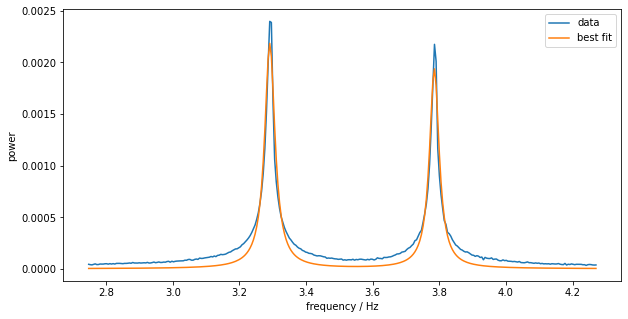

In [10]:
# we are going to fit a lorentzian function
lor1 = LorentzianModel(prefix='one_')
# estimate the parameters for the first lorentzian
lor1_pars = lor1.make_params(amplitude=0.015, center=3.30,sigma=0.001)
# we are going to fit another lorentzian function
lor2 = LorentzianModel(prefix='two_')
# estimate the parameters for the first lorentzian
lor2_pars = lor2.make_params(amplitude=0.005, center=3.80,sigma=0.001)
mod = lor1 + lor2
# appends the background parameters to the lorentzian parameters
lor1_pars += lor2_pars
results = mod.fit(pp, lor1_pars, x=ff)
print(results.fit_report())
plt.figure(figsize=(width,height))
plt.plot(ff, pp, label='data')
#plt.plot(ff, out.init_fit, label='initial fit')
plt.plot(ff, results.best_fit, label='best fit')
plt.legend(loc='best')
plt.xlabel('frequency / Hz')
plt.ylabel('power')
plt.show()

[[Model]]
    ((Model(lorentzian, prefix='l1_') + Model(lorentzian, prefix='l2_')) + Model(linear, prefix='bkg_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 91
    # data points      = 312
    # variables        = 8
    chi-square         = 7.2807e-07
    reduced chi-square = 2.3950e-09
    Akaike info crit   = -6185.27169
    Bayesian info crit = -6155.32766
[[Variables]]
    l1_amplitude:   1.0893e-04 +/- 1.6458e-06 (1.51%) (init = 0.01)
    l1_center:      3.29128199 +/- 2.1607e-04 (0.01%) (init = 3.3)
    l1_sigma:       0.01554722 +/- 3.1865e-04 (2.05%) (init = 0.014)
    l1_fwhm:        0.03109445 +/- 6.3731e-04 (2.05%) == '2.0000000*l1_sigma'
    l1_height:      0.00223020 +/- 3.0994e-05 (1.39%) == '0.3183099*l1_amplitude/max(1e-15, l1_sigma)'
    l2_amplitude:   8.8765e-05 +/- 1.5801e-06 (1.78%) (init = 0.005)
    l2_center:      3.78522025 +/- 2.3306e-04 (0.01%) (init = 3.8)
    l2_sigma:       0.01426528 +/- 3.4409e-04 (2.41%) (init = 0.01)


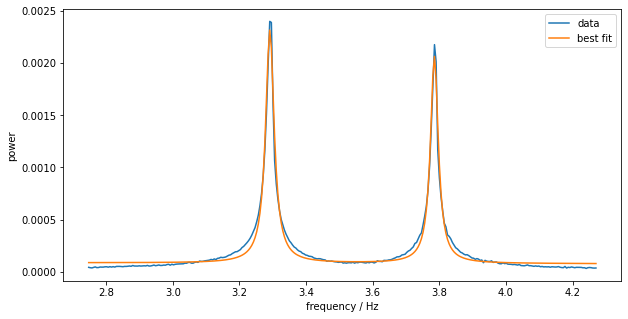

In [11]:
# lorentzian function number one
lor1 = LorentzianModel(prefix='l1_')
# initial guesses for the first lorentzian
pars = lor1.make_params(amplitude=0.010, center=3.30, sigma=0.014)
# lorentzian function number two
lor2 = LorentzianModel(prefix='l2_')
# # initial guesses for the second lorentzian
lor2_pars = lor2.make_params(amplitude=0.005, center=3.80, sigma=0.01)
# appends the background parameters to the lorentzian parameters
pars += lor2_pars
# we will add a constant offset using the built-in linear background
bkg = LinearModel(prefix='bkg_')
# initial guesses for the background parameters
bkg_pars = bkg.make_params(intercept=0.0, slope=0.0)
mod = lor1 + lor2 + bkg
# make a composite model
pars += bkg_pars
# appends the background parameters to the lorentzian parameters
results = mod.fit(pp, pars, x=ff)
print(results.fit_report())
plt.figure(figsize=(width,height))
plt.plot(ff, pp, label='data')
#plt.plot(ff, results.init_fit, label='initial fit')
plt.plot(ff, results.best_fit, label='best fit')
plt.legend(loc='best')
plt.xlabel('frequency / Hz')
plt.ylabel('power')
plt.savefig('2020-12-19-200s-90-positive.pdf')
plt.show()